In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## LSTM

Long short term memory, LSTM -  представляет собой систему глубинного обучения, при реализации которой удалось обойти проблему исчезновения или взрыва градиентов в процессе обучения методом обратного распространения ошибки. 

Сеть LSTM обычно модерируется с помощью рекуррентных вентилей, которые называются вентили (gates) «забывания».

Ошибки распространяются назад по времени через потенциально неограниченное количество виртуальных слоёв. 

Таким образом происходит обучение в LSTM, при этом сохраняя память о временных интервалах в прошлого



https://github.com/nicodjimenez/lstm

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, GRU, SimpleRNN, LSTM, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

import numpy as np
from PIL import Image
import tensorflow as tf

In [3]:
xLen=10 ## длина истории
n=5   ## длина вектора данных

In [4]:
x = Input(shape = (xLen,n,))
y = LSTM(  32, return_sequences = True, )(x)
y1 = LSTM( 32,return_sequences = False)(y)


model = Model(x,y1)
model.compile(loss = 'mse',optimizer = 'Adam',metrics = ['mse'])

In [5]:
y1

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'lstm_1')>

In [6]:
y

<KerasTensor: shape=(None, 10, 32) dtype=float32 (created by layer 'lstm')>

In [7]:
x

<KerasTensor: shape=(None, 10, 5) dtype=float32 (created by layer 'input_1')>

In [8]:
xx = np.random.randn(1,xLen,n)

y.shape,xx.shape 


(TensorShape([None, 10, 32]), (1, 10, 5))

In [9]:
yy = model.predict(xx)

1/1 [==============================] - 3s 3s/step


In [10]:
yy.shape

(1, 32)

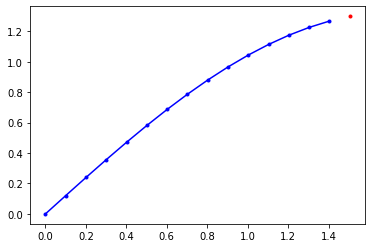

((284, 1), (284, 15, 2))

In [12]:
N = 300
t = np.linspace(0,30,N).reshape((N,1))
x = np.sin(t) + t*0.2
n = 2
xLen = 15


plt.plot(t[0:xLen],x[0:xLen],'.-b')


h = 1  # горизонт прогноза
xx = []
y = []
for i in range(N-xLen - h):
  xx.append(np.concatenate( (t[i:xLen+i],x[i:xLen+i])).reshape((xLen,2)))
  y.append(x[i+h+xLen-1])
xx = np.array(xx)  
y = np.array(y)

plt.plot(t[xLen+h-1],y[0],'.r')
plt.show()
y.shape,xx.shape 

In [18]:
x_in = Input(shape = (xLen,n,))
y_out = LSTM(8,return_sequences = False)(x_in)
y_out = Dense(1,activation = 'linear')(y_out)


model = Model(x_in,y_out)
model.compile(loss = 'mse',optimizer = 'Adam',metrics = ['mse'])

In [19]:
x_in

<KerasTensor: shape=(None, 15, 2) dtype=float32 (created by layer 'input_3')>

In [20]:
test_n = 200
model.fit(xx[:test_n,:,:],y[:test_n], epochs = 20)

Epoch 1/20
7/7 [==============================] - 1s 4ms/step - loss: 11.6543 - mse: 11.6543
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 10.4360 - mse: 10.4360
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 9.2765 - mse: 9.2765
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 8.0861 - mse: 8.0861
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 7.0785 - mse: 7.0785
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 6.3987 - mse: 6.3987
Epoch 7/20
7/7 [==============================] - 0s 4ms/step - loss: 5.8656 - mse: 5.8656
Epoch 8/20
7/7 [==============================] - 0s 4ms/step - loss: 5.3757 - mse: 5.3757
Epoch 9/20
7/7 [==============================] - 0s 4ms/step - loss: 4.9478 - mse: 4.9478
Epoch 10/20
7/7 [==============================] - 0s 4ms/step - loss: 4.5199 - mse: 4.5199
Epoch 11/20
7/7 [==============================] - 0s 4ms/step - loss: 4.1538 - mse: 

In [21]:
ypred = model.predict(xx[test_n:,:,:])


3/3 [==============================] - 0s 4ms/step


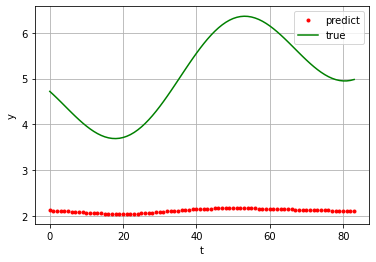

In [22]:
plt.plot(ypred,'.r', label = 'predict')
plt.plot(y[test_n:],'g', label = 'true')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [23]:
yy

array([[ 0.01879   ,  0.05892501, -0.03001798,  0.04513822,  0.04142854,
         0.00162827, -0.01542175, -0.04139446,  0.02542876, -0.06920413,
         0.0536962 ,  0.06070507,  0.0141884 ,  0.05556319,  0.014536  ,
        -0.05800266,  0.01077508, -0.02917549, -0.02026041, -0.0319811 ,
         0.01810004, -0.064169  , -0.01334498, -0.01280914,  0.01728567,
        -0.02190636, -0.00623701,  0.08070432, -0.06644173,  0.05649191,
         0.03902921,  0.00420428]], dtype=float32)